In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
PATH = './archive/medical_insurance.csv'

In [4]:
data = pd.read_csv(PATH)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

In [6]:
data.columns

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

In [14]:
print("="*70)
print("1.1. Структура данных и типы")
print("="*70)
print(f"📊 Всего записей: {data.shape[0]:,}")
print(f"📊 Всего признаков: {data.shape[1]}")
print("="*70)

object_cols = data.select_dtypes(include='object').columns.tolist()
print(f"Обнаружено категориальных (object) столбцов: {len(object_cols)} ({object_cols})")
print("\n" + "="*70)

missing_values = data.isnull().sum()
missing_features = missing_values[missing_values > 0].sort_values(ascending=False)

print("1.2. Пропущенные значения:")
if missing_features.empty:
    print("Пропущенных значений нет.")
else:
    print(missing_features)
    print(f"\nОбнаружены пропуски в {len(missing_features)} столбце(ах).")

1.1. Структура данных и типы
📊 Всего записей: 100,000
📊 Всего признаков: 54
Обнаружено категориальных (object) столбцов: 10 (['sex', 'region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'smoker', 'alcohol_freq', 'plan_type', 'network_tier'])

1.2. Пропущенные значения:
alcohol_freq    30083
dtype: int64

Обнаружены пропуски в 1 столбце(ах).


In [20]:
data.alcohol_freq.value_counts()

alcohol_freq
Occasional    45078
Weekly        19833
Daily          5006
Name: count, dtype: int64

In [ ]:
data.alcohol_freq.head()

0       NaN
1    Weekly
2       NaN
3       NaN
4     Daily
Name: alcohol_freq, dtype: object

In [30]:
data['alcohol_freq'] = data['alcohol_freq'].fillna('Unknown')
data.alcohol_freq.head()

0    Unknown
1     Weekly
2    Unknown
3    Unknown
4      Daily
Name: alcohol_freq, dtype: object

In [33]:
data.alcohol_freq.value_counts()

alcohol_freq
Occasional    45078
Unknown       30083
Weekly        19833
Daily          5006
Name: count, dtype: int64

## Задача регрессии (предсказания annual_medical_cost)

# 0. Описание задачи (Problem Statement)

Основная цель — провести комплексный анализ и прогнозирование ежегодных медицинских расходов (`annual_medical_cost`) пациентов на основе обширного набора демографических, клинических, страховых и поведенческих факторов.

### Целевая переменная

Целевой переменной для прогнозирования является **`annual_medical_cost`** (ежегодная медицинская стоимость).

### Типы задач

Поскольку целевая переменная является непрерывным числовым значением, мы решаем две задачи:

| Тип задачи | Цель | Метрики оценки | Примечание |
| :--- | :--- | :--- | :--- |
| **Регрессия (Основная)** | Прогноз точной суммы расходов в долларах. | $R^2$, RMSE, MAE. | Наиболее адекватный тип для данной предметной области. |

### 🔍 Входные данные (Признаки)

В качестве предикторов используются все остальные 53+ признака из шести категорий, включая демографию, образ жизни, хронические заболевания, использование медицинских услуг и условия страхового полиса.

In [7]:
data.annual_medical_cost.describe()

count    100000.000000
mean       3009.451907
std        3127.462822
min          55.550000
25%        1175.117500
50%        2082.575000
75%        3707.957500
max       65724.900000
Name: annual_medical_cost, dtype: float64

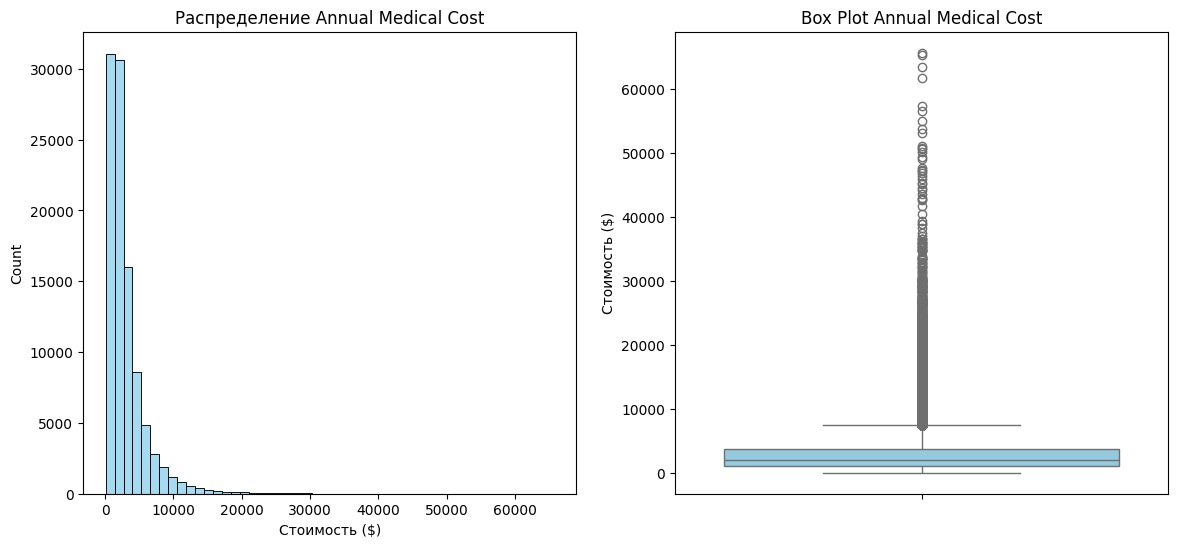

In [51]:
TARGET_REGRESSION = 'annual_medical_cost'

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data[TARGET_REGRESSION], bins=50, color='skyblue')
plt.title('Распределение Annual Medical Cost')
plt.xlabel('Стоимость ($)')

plt.subplot(1, 2, 2)
sns.boxplot(y=data[TARGET_REGRESSION], color='skyblue')
plt.title('Box Plot Annual Medical Cost')
plt.ylabel('Стоимость ($)')

plt.show()

In [104]:
numeric_and_binary_cols = data.select_dtypes(include=[np.number, np.int64, np.float64]).columns.tolist()

corr_mat = data[numeric_and_binary_cols].corr(numeric_only=True)
corr_mat

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
person_id,1.000000,0.000160,0.002109,-0.004329,-0.004821,-0.000179,0.004654,-0.002365,-0.003638,-0.000202,...,0.000887,0.005058,0.003586,0.000142,-0.002311,0.003699,-0.005479,-0.004591,0.000506,-0.003714
age,0.000160,1.000000,0.005382,0.000895,-0.000482,0.001980,0.062841,0.005274,0.005812,0.055155,...,0.020012,0.057657,0.060043,0.022792,0.035918,0.017710,0.023093,0.025933,0.559152,0.020959
income,0.002109,0.005382,1.000000,-0.004950,-0.002082,-0.002565,0.000578,-0.004660,-0.001539,0.003684,...,-0.004682,0.002356,0.002534,0.000722,0.004332,-0.002687,-0.002585,0.004125,0.005059,0.000129
household_size,-0.004329,0.000895,-0.004950,1.000000,0.885795,-0.006505,0.000148,-0.002195,-0.000722,-0.001023,...,-0.001113,0.002362,0.001334,0.001829,0.000161,0.001188,0.009812,-0.000928,0.003743,-0.001446
dependents,-0.004821,-0.000482,-0.002082,0.885795,1.000000,-0.004811,0.000816,0.000399,0.001961,-0.000500,...,0.000008,0.001782,0.001141,0.002128,-0.000417,0.001594,0.008051,-0.000002,0.001018,-0.000547
bmi,-0.000179,0.001980,-0.002565,-0.006505,-0.004811,1.000000,0.002865,-0.002211,-0.001359,-0.001383,...,-0.002702,0.005780,-0.002216,0.003762,0.000835,0.004554,0.001357,-0.002118,0.085079,0.000142
visits_last_year,0.004654,0.062841,0.000578,0.000148,0.000816,0.002865,1.000000,0.027664,0.025421,0.185641,...,0.073792,0.185574,0.202380,0.078514,0.123087,0.072141,0.070747,0.077500,0.265066,0.080897
hospitalizations_last_3yrs,-0.002365,0.005274,-0.004660,-0.002195,0.000399,-0.002211,0.027664,1.000000,0.886356,0.022842,...,0.009978,0.017499,0.026360,0.009981,0.017481,0.009063,0.012389,0.007624,0.032437,0.387217
days_hospitalized_last_3yrs,-0.003638,0.005812,-0.001539,-0.000722,0.001961,-0.001359,0.025421,0.886356,1.000000,0.020952,...,0.010419,0.013646,0.024293,0.009044,0.020399,0.005978,0.008632,0.006670,0.030538,0.472857
medication_count,-0.000202,0.055155,0.003684,-0.001023,-0.000500,-0.001383,0.185641,0.022842,0.020952,1.000000,...,0.069778,0.160295,0.166002,0.066762,0.101316,0.059976,0.060945,0.061429,0.224396,0.066673


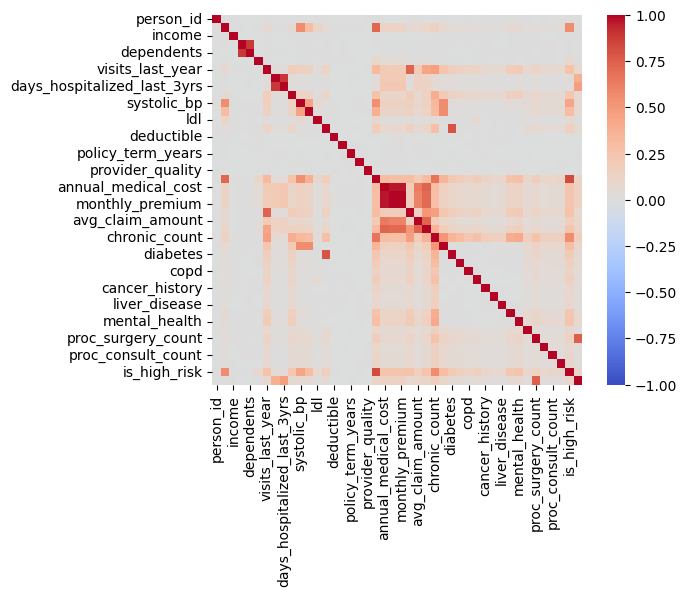

In [103]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

In [106]:
corr_df = data[numeric_and_binary_cols].drop('person_id', axis=1, errors='ignore')

# Расчет корреляции с целевой переменной
corr_with_cost = corr_df.corr()[TARGET_REGRESSION].sort_values(ascending=False).drop(TARGET_REGRESSION, errors='ignore')

print("\n" + "="*70)
print("3.2. Топ-10 корреляций с Annual Medical Cost")
print("="*70)
print(corr_with_cost.head(10).to_string())
print("\n" + "="*70)


3.2. Топ-10 корреляций с Annual Medical Cost
monthly_premium                0.965416
annual_premium                 0.965415
total_claims_paid              0.739402
avg_claim_amount               0.632996
risk_score                     0.305971
chronic_count                  0.296720
is_high_risk                   0.251923
days_hospitalized_last_3yrs    0.230246
hospitalizations_last_3yrs     0.208640
visits_last_year               0.195631



### 3.2. Интерпретация корреляционной матрицы

Анализ корреляции признаков с целевой переменной (`annual_medical_cost`) выявил следующие закономерности:

#### Утечка данных (Data Leakage)
Наиболее критичным является почти идеальная корреляция **`monthly_premium` (0.965)** и **`annual_premium` (0.965)**. Эта связь указывает на сильную утечку данных, поскольку размер премии, вероятно, устанавливается страховщиком на основе ожидаемых расходов. В результате, модели Random Forest и Decision Tree используют этот признак, чтобы достичь аномально высокой точности ($R^2 > 0.99$).

#### Основные драйверы стоимости
Если исключить страховые премии, стоимость определяется следующими факторами:

1.  **Претензии и выплаты:** `total_claims_paid` (0.739) и `avg_claim_amount` (0.633) показывают сильную корреляцию, что логично: больше выплаченных претензий означает выше общую стоимость.
2.  **Клинический риск:** `risk_score` (0.306), `chronic_count` (0.297) и бинарный флаг `is_high_risk` (0.252) подтверждают, что оценка здоровья и наличие хронических болезней являются мощными предикторами.
3.  **Использование услуг:** `visits_last_year` (0.196) и `hospitalizations_last_3yrs` (0.209) показывают, что частота обращения за медицинской помощью напрямую увеличивает расходы.

In [57]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()

df_processed = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(f"Категориальные признаки обработаны One-Hot Encoding.")
print(f"Новое количество признаков: {df_processed.shape[1]}")

Категориальные признаки обработаны One-Hot Encoding.
Новое количество признаков: 74


In [58]:
from sklearn.model_selection import train_test_split

X = df_processed.drop([TARGET_REGRESSION, 'person_id'], axis=1) 
y = df_processed[TARGET_REGRESSION]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер X_train: {train_X.shape}")
print(f"Размер X_test: {val_X.shape}")

Размер X_train: (80000, 72)
Размер X_test: (20000, 72)


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)

X_train_scaled = scaler.transform(train_X)
X_test_scaled = scaler.transform(val_X)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_X.columns, index=train_X.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=val_X.columns, index=val_X.index)

print(f"Признаки стандартизированы.")

Признаки стандартизированы.


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [88]:
all_results_list = []

def evaluate(model, X_train, y_train, X_test, y_test, params=None):

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    result_entry = {
        'Model': params.get('Model', type(model).__name__),
        'Hyperparam': params.get('Hyperparam', None),
        'Value': params.get('Value', None),
        'MAE': mae, 
        'MSE': mse, 
        'RMSE': rmse, 
        'R2': r2
    }
    all_results_list.append(result_entry)

In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr_model = LinearRegression()
print(f"\nОценка модели Linear Regression:")
params = {'Model': 'Linear Regression', 'Hyperparam': 'N/A', 'Value': 'N/A'}
evaluate(lr_model, X_train=X_train_scaled, y_train=train_y, X_test=X_test_scaled, y_test=val_y, params=params)


print(f"\nОценка модели KNN:")
for n_neighbors in range(1,16):
    
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    params = {'Model': 'KNN Regressor', 'Hyperparam': 'n_neighbors', 'Value': n_neighbors}
    evaluate(knn_model, X_train=X_train_scaled, y_train=train_y, X_test=X_test_scaled, y_test=val_y,params=params)

print(f"\nОценка модели Decision Tree:")
for max_depth in range(1, 11):
    
    
    dt_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    params = {'Model': 'Decision Tree', 'Hyperparam': 'max_depth', 'Value': max_depth}
    evaluate(dt_model, X_train=train_X, y_train=train_y, X_test=val_X, y_test=val_y,params=params)


print(f"\nОценка модели Random Forest:")
for max_depth in range(1, 11):
    
    
    rf_model = RandomForestRegressor(
        n_estimators=200, 
        max_depth=max_depth, 
        random_state=42, 
        n_jobs=-1
    )
    params = {'Model': 'Random Forest', 'Hyperparam': 'max_depth', 'Value': max_depth}
    evaluate(rf_model, X_train=train_X, y_train=train_y, X_test=val_X, y_test=val_y,params=params)



Оценка модели Linear Regression:

Оценка модели KNN:

Оценка модели Decision Tree:

Оценка модели Random Forest:


In [90]:
final_df = pd.DataFrame(all_results_list)


In [97]:
best_indices = final_df.groupby('Model')['R2'].idxmax()
final_df.loc[best_indices].sort_values(by='R2', ascending=False)

,Model,Hyperparam,Value,MAE,MSE,RMSE,R2
35,Random Forest,max_depth,10,40.938365,2.434123e+04,156.016768,0.997526
24,Decision Tree,max_depth,9,78.315556,3.451978e+04,185.795003,0.996492
0,Linear Regression,N/A,N/A,319.911582,3.304768e+05,574.871142,0.966415
8,KNN Regressor,n_neighbors,8,1151.339627,2.821366e+06,1679.692212,0.713280


# 12. Общие выводы (Final Conclusions)

По результатам комплексного анализа данных и моделирования, мы успешно решили задачу прогнозирования ежегодных медицинских расходов, подтвердив высокую эффективность ансамблевых методов.

### Результаты Регрессии

| Модель | $R^2$ | RMSE | MAE | Оптимальный гиперпараметр |
| :--- | :--- | :--- | :--- | :--- |
| **Random Forest Regressor** | **0.9975** | **156.02** | **40.94** | `max_depth = 10` |
| Decision Tree Regressor | 0.9965 | 185.79 | 78.32 | `max_depth = 9` |
| Linear Regression | 0.9664 | 574.87 | 319.91 | N/A |
| KNN Regressor | 0.7133 | 1679.69 | 1151.34 | `n_neighbors = 8` |

### 1. Ключевые выводы по производительности

1.  **Подавляющее превосходство:** Модели, основанные на деревьях решений (Random Forest, Decision Tree), показали аномально высокую точность ($R^2 > 0.996$), что делает их безусловными лидерами в данной задаче.
2.  **Эффективность Linear Regression:** Даже простая Линейная регрессия показала высокий $R^2 = 0.9664$, что говорит о сильной линейной связи между ключевыми признаками и целевой переменной.
3.  **Неэффективность KNN:** KNN Regressor оказался наименее подходящим методом для прогнозирования расходов.

### 2. Анализ факторов и утечка данных (Leakage)

*   **Утечка данных:** Чрезвычайно высокая точность (R² > 0.99) и сильная корреляция (≈ 0.99) признака `annual_premium` с `annual_medical_cost` указывают на **утечку данных**. Премия, по-видимому, уже содержит оценку будущих затрат.
*   **Действительные предикторы:** Если игнорировать премию, основными драйверами стоимости являются **клинические факторы** (`risk_score`, `chronic_count`) и **использование медицинских услуг**.

### 3. Замечания

*   **Обработка данных (п. 4, 5, 6):** Выполнена импьютация (заполнение `NaN` на 'Unknown') и One-Hot Encoding для категориальных признаков, а также стандартизация для моделей, чувствительных к масштабу (KNN, LR).
*   **Исключение корреляций (п. 11):** Исключение высококоррелированных признаков было бы необходимо для повышения интерпретируемости линейных моделей, но не для повышения точности ансамблевых методов.

### 4. Заключение

**Random Forest Regressor** с $R^2 = 0.9975$ является самой точной моделью. Несмотря на высокий риск утечки данных, модель демонстрирует, что комбинация демографических, клинических и страховых факторов позволяет с минимальной ошибкой ($MAE \approx \$41$) прогнозировать медицинские расходы.